### Mini-Batch Gradient Descent for Simple Linear Regression

Gradient Descent is an iterative optimization algorithm used to minimize the **cost function**.  
It mainly comes in three variants — **Batch**, **Stochastic**, and **Mini-Batch Gradient Descent**.

#### 🧮 1. Batch Gradient Descent
In Batch Gradient Descent, we use the **entire dataset** to compute the gradient and update the parameters in each iteration.

**Problems:**  
- Computation becomes **very slow** for large datasets.  
- High **memory usage**, since the entire dataset is processed at once.  
- Can get stuck in **local minima** and convergence can be slow.

#### ⚡ 2. Stochastic Gradient Descent (SGD)
In SGD, the parameters are updated after computing the gradient for **each individual data point**.

**Problems:**  
- Frequent updates make the convergence **noisy**.  
- The cost function fluctuates in a **zig-zag** pattern.  
- It may take longer to reach a stable minimum.

#### ⚙️ 3. Mini-Batch Gradient Descent
Mini-Batch Gradient Descent combines the best of both worlds —  
the **efficiency** of SGD and the **stability** of Batch Gradient Descent.

The dataset is divided into small batches (for example, 16, 32, or 64 samples per batch).  
For each iteration, the average gradient of one batch is used to update the model parameters.

**Advantages:**  
- Faster computation than Batch Gradient Descent.  
- Smoother convergence compared to SGD.  
- Well-suited for **GPU parallelization**.  
- Provides a good **balance** between stability and efficiency.


### Mini-Batch Gradient Descent for Simple Linear Regression

In **Mini-Batch Gradient Descent**, the dataset is divided into small groups of samples called *batches* (for example, 16, 32, or 64 samples per batch).  
Instead of updating the model after each sample (as in SGD) or after the entire dataset (as in Batch GD), we update it after processing each mini-batch.

This method provides a good balance between **computational efficiency** and **convergence stability**.

---

#### 🧩 Working Principle

For **Simple Linear Regression**, the hypothesis (prediction) is:

$$
\hat{y}_i = w x_i + b
$$

The **cost function** (Mean Squared Error) for a mini-batch of size \( m_b \) is:

$$
J(w, b) = \frac{1}{2m_b} \sum_{i=1}^{m_b} \left( \hat{y}_i - y_i \right)^2
$$

---

#### ⚙️ Gradient Computation

The partial derivatives (gradients) for the mini-batch are:

$$
\frac{\partial J}{\partial w} = \frac{1}{m_b} \sum_{i=1}^{m_b} ( \hat{y}_i - y_i ) x_i
$$

$$
\frac{\partial J}{\partial b} = \frac{1}{m_b} \sum_{i=1}^{m_b} ( \hat{y}_i - y_i )
$$

---

#### 🔁 Parameter Update Rule

After computing the gradients for a mini-batch, the parameters are updated as:

$$
w := w - \alpha \frac{\partial J}{\partial w}
$$

$$
b := b - \alpha \frac{\partial J}{\partial b}
$$

where \( \alpha \) is the **learning rate**.

---

#### ✅ Advantages of Mini-Batch Gradient Descent

- Faster than Batch Gradient Descent for large datasets.  
- Smoother convergence compared to Stochastic Gradient Descent.  
- Efficient for **vectorized operations** and **GPU parallelization**.  
- Reduces the variance in parameter updates.

---

🧠 **Summary:**  
Mini-Batch Gradient Descent provides a practical and efficient way to train models — combining the **speed of SGD** with the **stability of Batch Gradient Descent**.


In [14]:
import numpy as np
import pandas as pd
from sklearn.model_selection import  train_test_split
from sklearn.metrics import r2_score, mean_squared_error
import matplotlib.pyplot as plt


In [2]:
data = pd.read_csv("Experience-Salary.csv")

In [3]:
data.head()

,exp(in months),salary(in thousands)
0,18.290293,16.521825
1,17.023407,11.666234
2,26.343613,23.167255
3,19.105834,20.877145
4,27.742516,23.166236


In [4]:
X = data['exp(in months)'].values
Y = data['salary(in thousands)'].values

In [5]:
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.2)

In [6]:
class MiniBatchGradient:
    def __init__(self):
        self.intercept = 0
        self.slope = 0
    def fit(self, x_train, y_train, LearningRate = 0.001, epoches = 100, BatchSize = 10):
        for i in range(epoches):
            for j in range(int(x_train.shape[0] / BatchSize)):
                rowNums = np.random.randint(0, x_train.shape[0],BatchSize)
                y_pred = (x_train[rowNums] * self.slope) + self.intercept
                
                new_intercept =  (-2 / len(x_train)) * np.mean(y_train[rowNums] - y_pred)
                self.intercept = self.intercept - (LearningRate * new_intercept)
                
                new_slope = (-2 / len(x_train)) * np.mean((y_train[rowNums] - y_pred) * x_train[rowNums])
                self.slope = self.slope - (LearningRate * new_slope)    
                
    def predict(self, x_test):
        return (self.slope * x_test) + self.intercept


In [7]:
smgd = MiniBatchGradient()

In [8]:
smgd.fit(x_train, y_train)

In [9]:
r2_score(y_test, smgd.predict(x_test))

0.6929249780608221

In [10]:
mean_squared_error(y_test, smgd.predict(x_test))

28.64159103582342

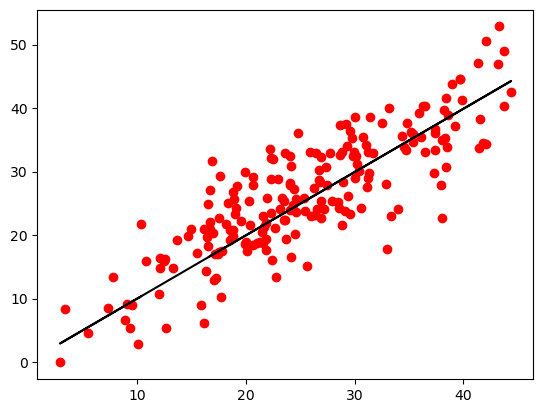

In [13]:
plt.scatter(x_test, y_test, color='red')
plt.plot(x_test, smgd.predict(x_test), color='black')

## 📊 Model Evaluation and Observation

After training the model using **Mini Batch Gradient Descent**,  
the evaluation metrics are as follows:

| Metric | Value |
|---------|--------|
| R² Score | 0.6929|
| MSE | 28.6415 |

---

### 🔹 Interpretation

The **R² score (0.69)** and **MSE (28.64)** indicate that the model  
is not fitting the data very accurately yet.

However, in this notebook, the **primary objective** was not to  
achieve the best accuracy but to **implement the Mini Batch Gradient Descent algorithm manually**  
and understand how it works mathematically and programmatically.

---

### 🔹 Why It’s Not Improved Further

The model’s performance could be improved by:
- Adjusting the **learning rate**
- Increasing the **number of epochs**
- Applying **feature scaling / normalization**
- Or using a **smaller step size**

But these steps are intentionally **not applied here**,  
because the main focus was to demonstrate the **algorithmic logic**  
rather than optimization or model tuning.

---

✅ **In short:**
> This implementation focuses on understanding **how Mini Batch Descent works**,  
> not on achieving high accuracy or the best-fit line.
